## Run data pipeline
Returns an aggegrated df to work with

In [7]:
#if needed, clear all previous processing
%reset -f

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/processed/10_sec_processed/HECTORdataAggregated_20240615_1030.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 309857


In [10]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

## Check  Imported Data and Import utilities


In [11]:
# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Number of rows with NaN values: 0
Columns with NaN values: []


In [12]:
raise SystemExit("Stopping execution of  DF IMPORT ")

SystemExit: Stopping execution of  DF IMPORT 

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


START MODELING 

                    MAE           MSE           RMSE        R²
Degree 1  158637.828343  9.375342e+10  306191.794672  0.475926
Degree 2  114487.912020  6.840254e+10  261538.795451  0.617631
Degree 3  113880.722689  6.727404e+10  259372.399650  0.623934


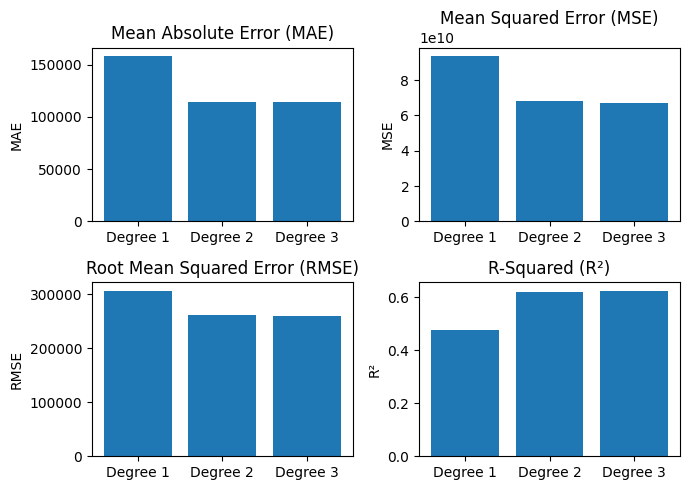

In [13]:
#Polynominal model with all three basic features against target with visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2, 3]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()



                    MAE                 MSE           RMSE        R²  \
Degree 1  158637.828343  93753415124.320816  306191.794672  0.475926   
Degree 2   114487.91202  68402541526.118027  261538.795451  0.617631   
Degree 3  113880.722689   67274041700.15519   259372.39965  0.623934   

                          RSS    Adj R²               Model  \
Degree 1  23238058943166512.0  0.475959  LinearRegression()   
Degree 2  16951079882902740.0  0.617727  LinearRegression()   
Degree 3  16667545255840304.0  0.624106  LinearRegression()   

                                                     X_poly  
Degree 1  [[1.0, 0.0, 3700.0, 0.0], [1.0, -2.35374999999...  
Degree 2  [[1.0, 0.0, 3700.0, 0.0, 0.0, 0.0, 0.0, 136900...  
Degree 3  [[1.0, 0.0, 3700.0, 0.0, 0.0, 0.0, 0.0, 136900...  

F-statistic for improvement from 2-degree to 3-degree model: 421.6476
P-value for the F-test: 0.0000


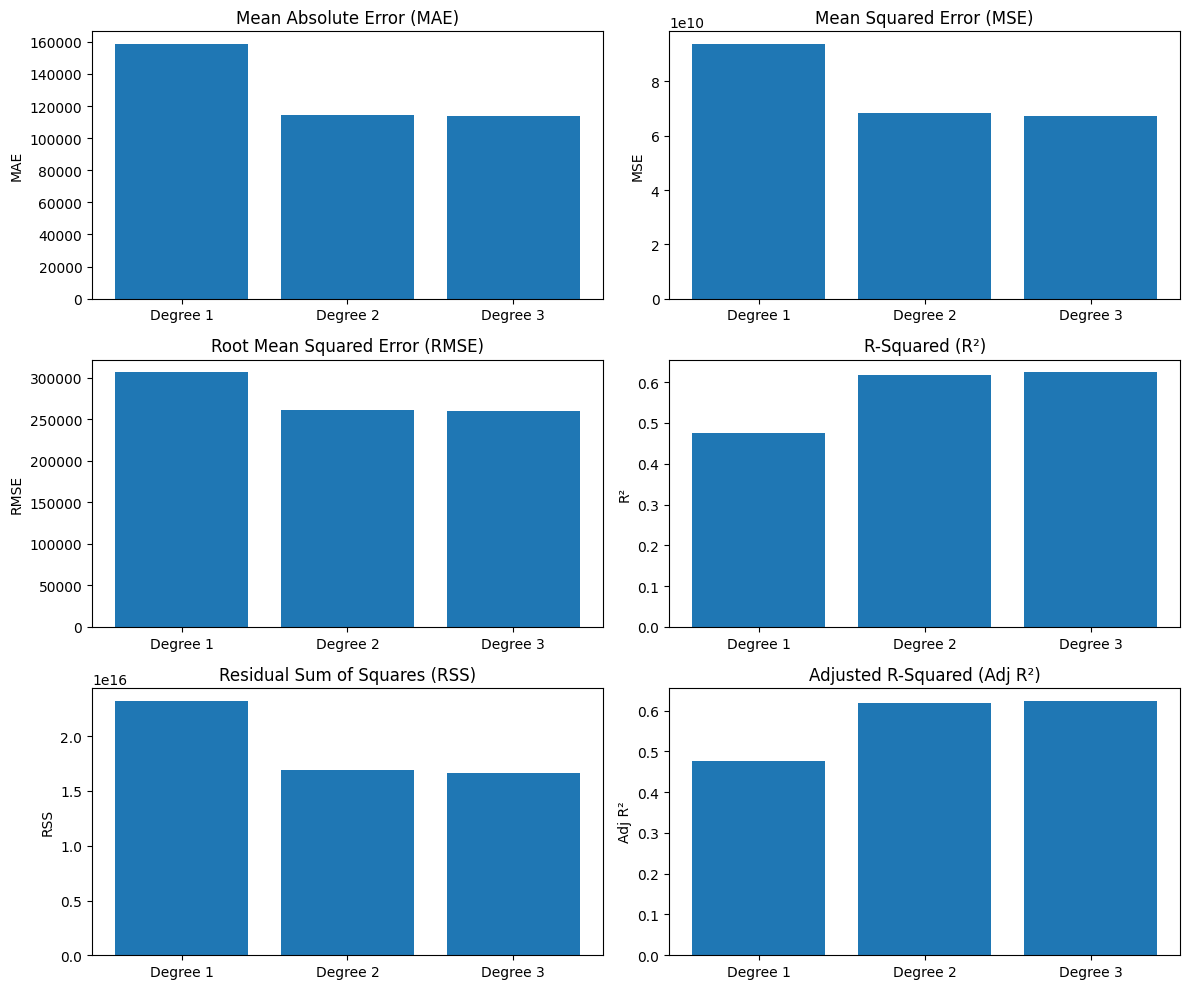

In [14]:
# Polynomial model with all three basic features against target with visualization and statistical tests
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import f

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X), poly

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation and additional metrics
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly, poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    # Fit model to calculate RSS and adjusted R²
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    rss = np.sum((y - y_pred) ** 2)
    
    n = len(y)
    k = X_poly.shape[1] - 1  # Number of predictors including polynomial terms
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
    
    # Store model and features for F-test
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores),
        'RSS': rss,
        'Adj R²': adj_r2,
        'Model': model,
        'X_poly': X_poly
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2, 3]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Calculate F-statistic and p-value for improvement from 2-degree to 3-degree
rss_2deg = results['Degree 2']['RSS']
rss_3deg = results['Degree 3']['RSS']
df_2deg = len(y_train) - results['Degree 2']['X_poly'].shape[1]
df_3deg = len(y_train) - results['Degree 3']['X_poly'].shape[1]
df_diff = df_2deg - df_3deg

# Degrees of freedom for the models
df_num = results['Degree 3']['X_poly'].shape[1] - results['Degree 2']['X_poly'].shape[1]
df_denom = df_3deg

# Calculate F-statistic
f_stat = ((rss_2deg - rss_3deg) / df_num) / (rss_3deg / df_denom)

# Calculate p-value from F-statistic
p_value = f.sf(f_stat, df_num, df_denom)

print(f"\nF-statistic for improvement from 2-degree to 3-degree model: {f_stat:.4f}")
print(f"P-value for the F-test: {p_value:.4f}")

# Plotting the results
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

# RSS plot
axes[2, 0].bar(df_results.index, df_results['RSS'])
axes[2, 0].set_title('Residual Sum of Squares (RSS)')
axes[2, 0].set_ylabel('RSS')

# Adjusted R² plot
axes[2, 1].bar(df_results.index, df_results['Adj R²'])
axes[2, 1].set_title('Adjusted R-Squared (Adj R²)')
axes[2, 1].set_ylabel('Adj R²')

plt.tight_layout()
plt.show()


In [15]:
# Calculate F-squared, Given values for R²
r2_2deg = 0.613193  # R² for 2-degree model
r2_3deg = 0.619533  # R² for 3-degree model

# Number of predictors (degree of polynomial + intercept is typically included in the fit)
k_2deg = X_train.shape[1]  # Number of features used in the 2-degree model
k_3deg = X_train.shape[1]  # Number of features used in the 3-degree model (usually the same as k_2deg)

# Using len to get the number of observations (n)
n = len(X_train)

# Print the number of observations
print(f"Number of observations (n): {n}")

# Adjusted R² calculation function
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# Calculate Adjusted R² for 2-degree and 3-degree models
adj_r2_2deg = adjusted_r2(r2_2deg, n, k_2deg)
adj_r2_3deg = adjusted_r2(r2_3deg, n, k_3deg)

# Print the Adjusted R² results
print(f"Adjusted R² for 2-degree model: {adj_r2_2deg:.6f}")
print(f"Adjusted R² for 3-degree model: {adj_r2_3deg:.6f}")


Number of observations (n): 247885
Adjusted R² for 2-degree model: 0.613188
Adjusted R² for 3-degree model: 0.619528


In [16]:
#Check if The 3-degree model is significantly better than the 2-degree model.

# Assuming e X_train, y_train, X_test, y_test already defined
# Define and fit the 2-degree polynomial model
degree_2 = 2
poly_2 = PolynomialFeatures(degree=degree_2, include_bias=False)
X_train_poly_2 = poly_2.fit_transform(X_train)
model_2 = LinearRegression().fit(X_train_poly_2, y_train)

# Define and fit the 3-degree polynomial model
degree_3 = 3
poly_3 = PolynomialFeatures(degree=degree_3, include_bias=False)
X_train_poly_3 = poly_3.fit_transform(X_train)
model_3 = LinearRegression().fit(X_train_poly_3, y_train)

# Calculate RSS for both models
rss_2 = np.sum((y_train - model_2.predict(X_train_poly_2)) ** 2)
rss_3 = np.sum((y_train - model_3.predict(X_train_poly_3)) ** 2)

# Number of observations
n = len(y_train)

# Number of parameters (including intercept)
k_2 = X_train_poly_2.shape[1] + 1  # adding 1 for intercept
k_3 = X_train_poly_3.shape[1] + 1  # adding 1 for intercept

# Calculate the F-statistic
numerator = (rss_2 - rss_3) / (k_3 - k_2)
denominator = rss_3 / (n - k_3)
F_statistic = numerator / denominator

# Degrees of freedom for F-test
df_numerator = k_3 - k_2
df_denominator = n - k_3

# Calculate the p-value
p_value = 1 - f.cdf(F_statistic, df_numerator, df_denominator)

# Output the results
print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Check if the p-value is below a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The 3-degree model is significantly better than the 2-degree model.")
else:
    print("There is no significant difference between the 2-degree and 3-degree models.")


F-statistic: 421.6476
p-value: 0.0000
The 3-degree model is significantly better than the 2-degree model.


                                  MAE           MSE           RMSE        R²
Polynomial Degree 2     119138.447952  7.115467e+10  266748.323402  0.616552
Random Forest           116042.561242  7.353500e+10  271173.369555  0.602149
Gradient Boosting       115118.330856  6.864658e+10  262004.932544  0.630159
Support Vector Machine  195331.984519  2.031316e+11  450701.221794 -0.094550


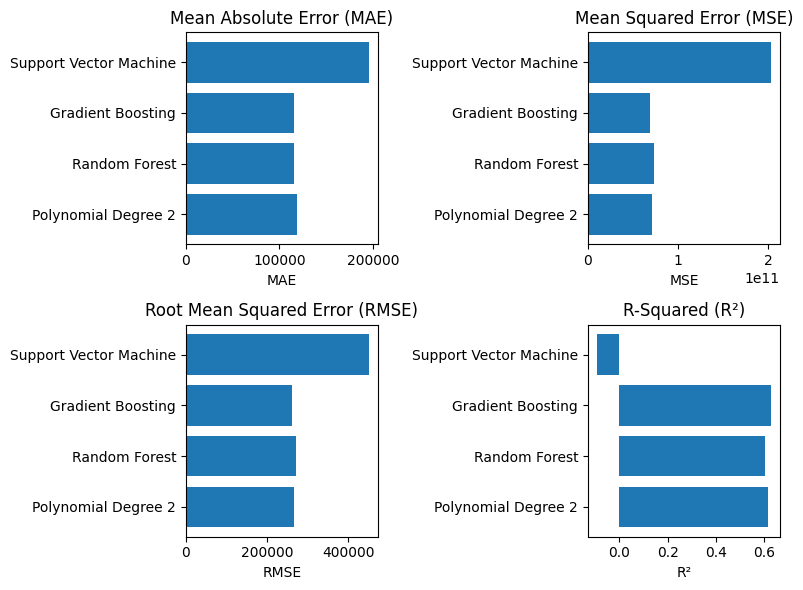

In [17]:
#5-fold cross validation results

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Assuming df is your DataFrame already loaded with appropriate data

# Sample a smaller subset if the dataset is very large
df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df
#df_sample=df

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df_sample[features]
y = df_sample[target]

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scoring dictionary
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(model, X, y, cv=5):  # Reduced number of folds to 3
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Initialize results dictionary
results = {}

# Evaluate Polynomial Regression with lower degrees to reduce computational cost
for degree in [2]:
    X_poly = generate_polynomial_features(X, degree)
    poly_model = LinearRegression()
    results[f'Polynomial Degree {degree}'] = evaluate_model_with_cross_validation(poly_model, X_poly, y)

# Evaluate Random Forest with fewer estimators
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced number of estimators to 50
results['Random Forest'] = evaluate_model_with_cross_validation(rf_model, X, y)

# Evaluate Gradient Boosting Machine (GBM) with fewer iterations
gbm_model = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Reduced number of estimators to 50
results['Gradient Boosting'] = evaluate_model_with_cross_validation(gbm_model, X, y)

# Evaluate Support Vector Machine (SVM) with kernel and standardized features
# Standardize the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
results['Support Vector Machine'] = evaluate_model_with_cross_validation(svm_model, X_scaled, y)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# MAE plot
axes[0, 0].barh(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_xlabel('MAE')

# MSE plot
axes[0, 1].barh(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_xlabel('MSE')

# RMSE plot
axes[1, 0].barh(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_xlabel('RMSE')

# R² plot
axes[1, 1].barh(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_xlabel('R²')

plt.tight_layout()
plt.show()




STOP BASIC MODELING

In [18]:
raise SystemExit("Stopping execution of BASIC MODELING.")

SystemExit: Stopping execution of BASIC MODELING.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [19]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

                                     MAE           MSE          RMSE  \
Base Degree 2               1.144879e+05  6.840254e+10  2.615388e+05   
Degree 2 + DistanceKM       5.734250e+08  8.147589e+22  2.854398e+11   
Degree 2 + StopOnOff        1.147675e+05  6.780785e+10  2.603994e+05   
Degree 2 + ThrottlePerc     1.126323e+05  4.394057e+10  2.096201e+05   
Degree 2 + MotorUseCurrent  6.570364e+03  2.847383e+08  1.687419e+04   
Degree 2 + CompOnOff        1.149757e+05  6.783075e+10  2.604434e+05   
Degree 2 + FC2Current       1.148951e+05  6.823798e+10  2.612240e+05   
Degree 2 + FC1Current       1.148899e+05  6.823823e+10  2.612245e+05   
Degree 2 + FC3Current       1.148990e+05  6.823790e+10  2.612238e+05   
Degree 2 + MotorTemp        1.154497e+05  6.831404e+10  2.613695e+05   
Degree 2 + TotalFCPower     1.149655e+05  6.825091e+10  2.612488e+05   
Degree 2 + FC1AirFlow       1.147544e+05  6.832614e+10  2.613927e+05   
Degree 2 + FC3AirFlow       1.147233e+05  6.832635e+10  2.613931

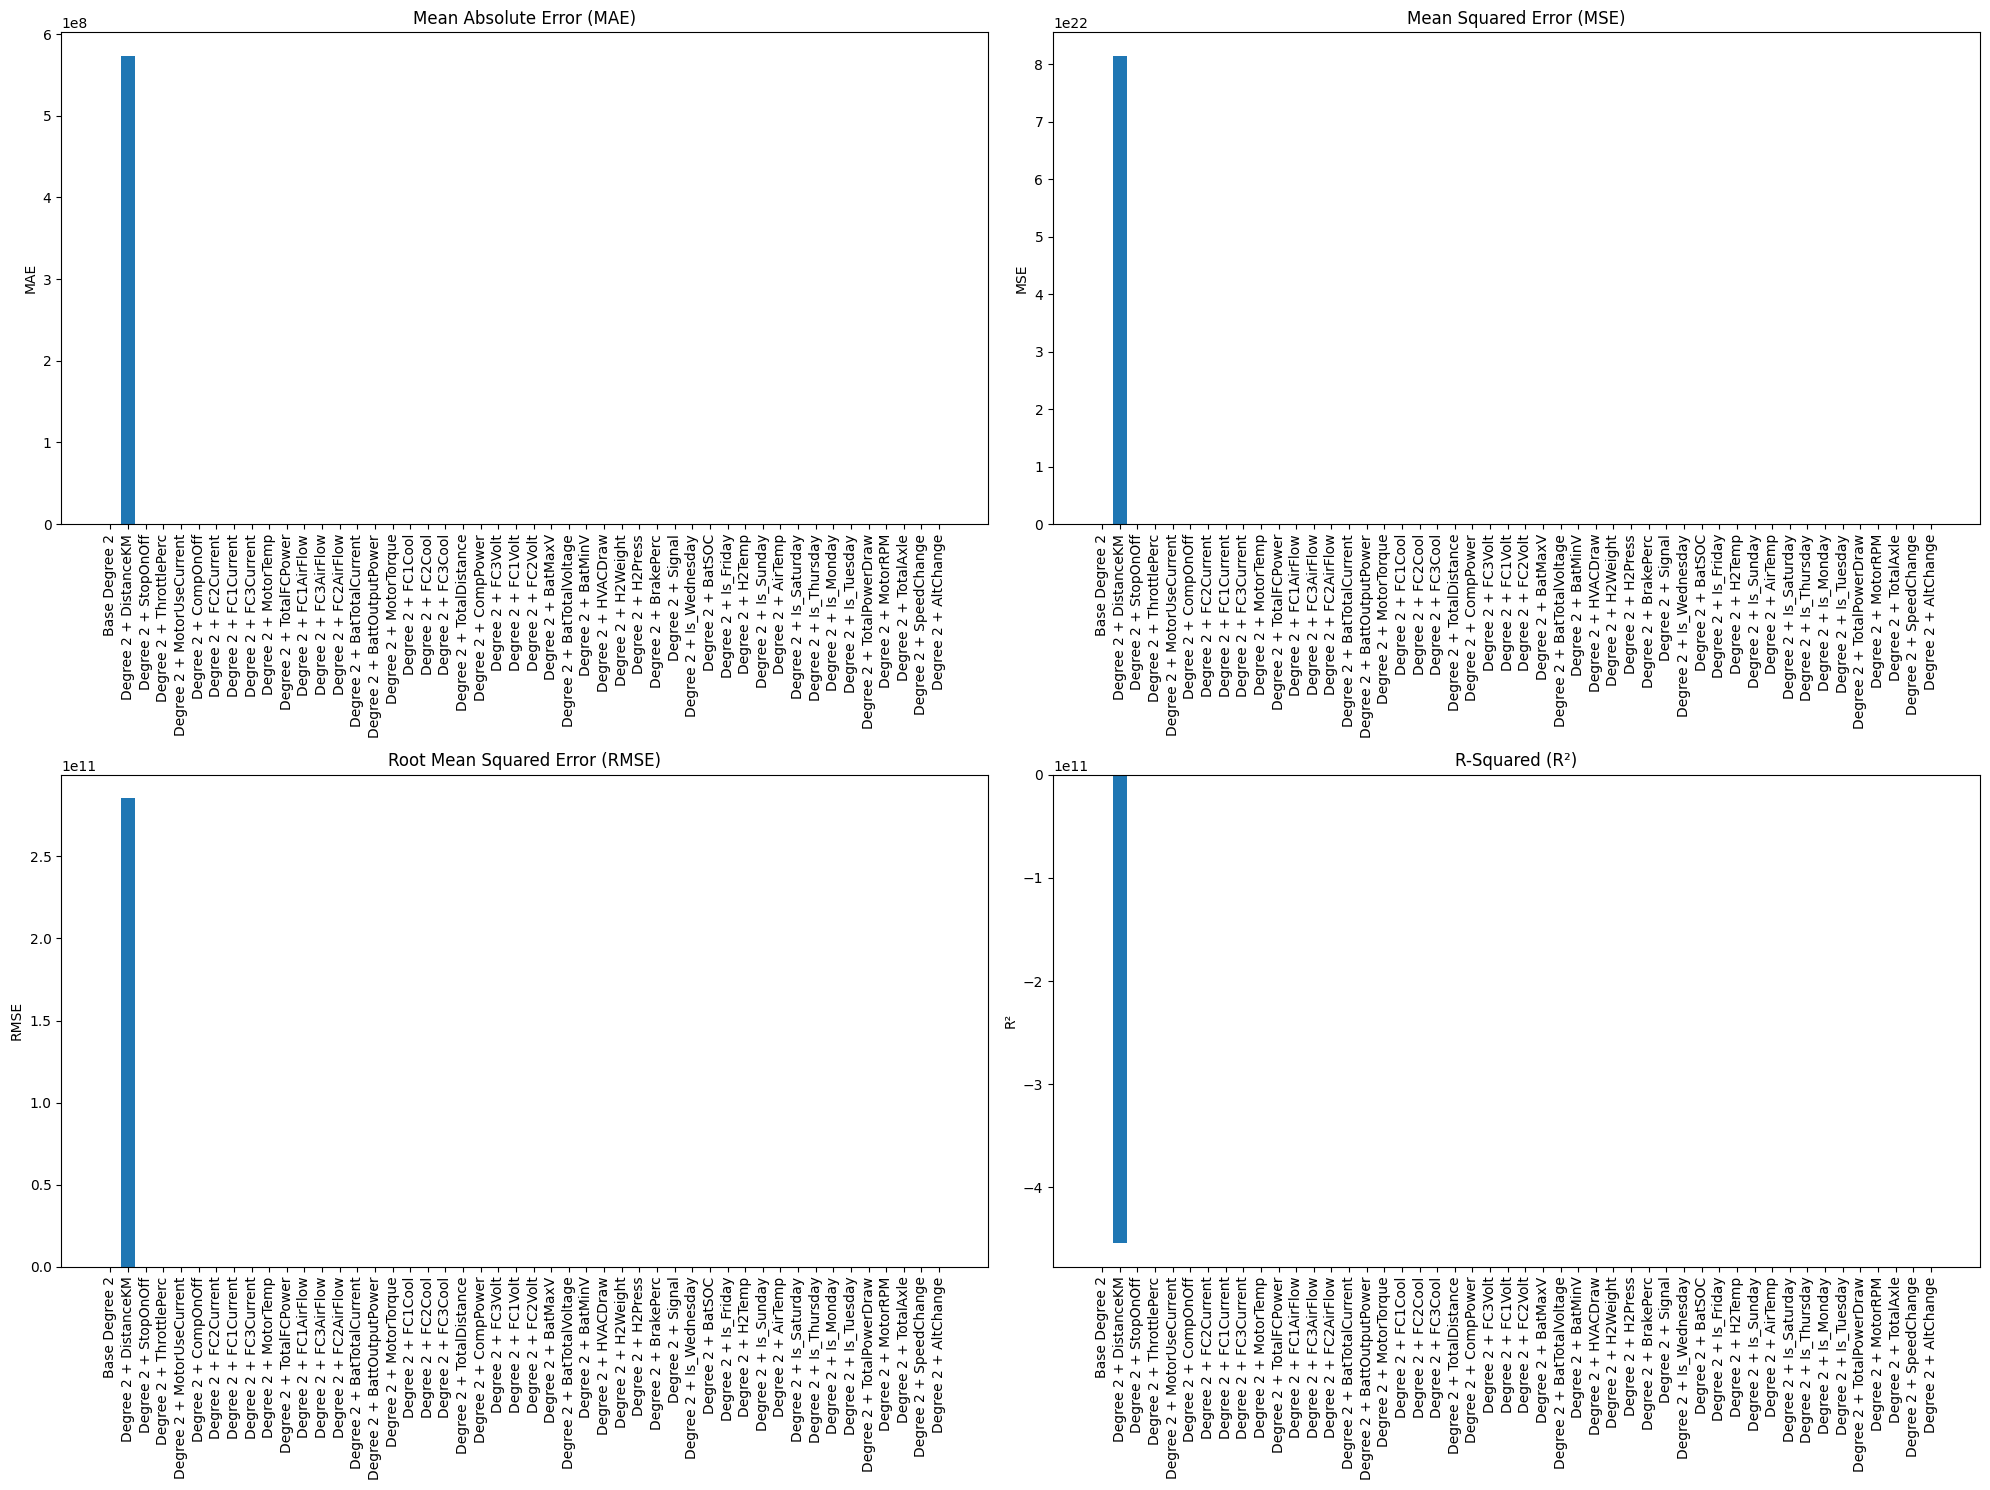

In [20]:
#Check for performance measures MAE, MSE, R-squared agaisnt all other features, add CSV File 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define base features and target
base_features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
additional_features = ['DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC2Current', 'FC1Current','FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow',
       'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower',
       'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV',
       'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press',
       'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday', 'H2Temp',
       'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday', 'Is_Monday',
       'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle', 'SpeedChange','AltChange' ]
target = 'MotorJoules'

# Split data into features and target
X = df[base_features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree=2, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate base model with degree 2
results = {}
results['Base Degree 2'] = evaluate_model_with_cross_validation(X_train, y_train)

# Evaluate models with additional features one by one
for feature in additional_features:
    X = df[base_features + [feature]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    key = f'Degree 2 + {feature}'
    results[key] = evaluate_model_with_cross_validation(X_train, y_train)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

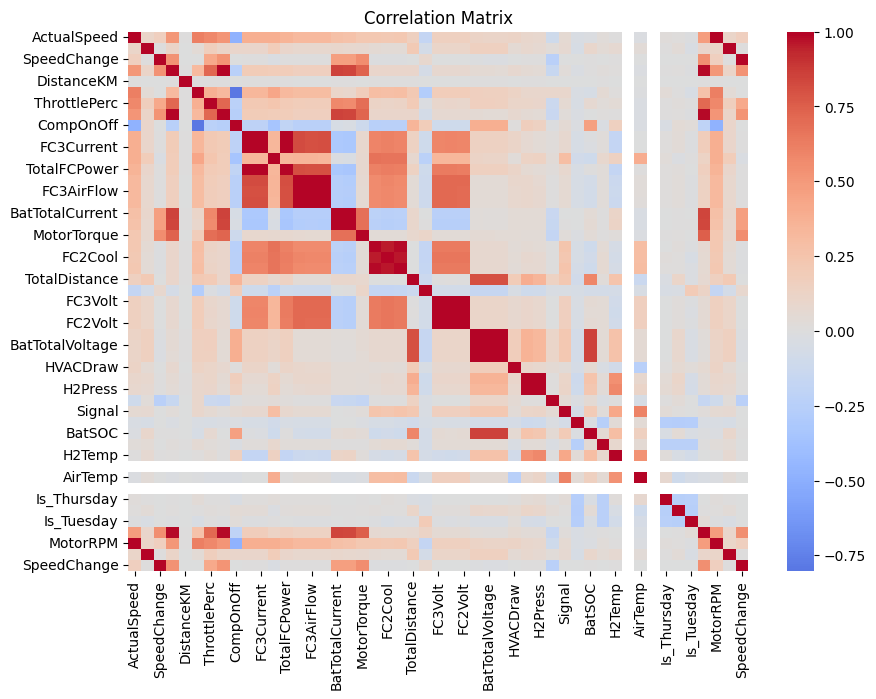

VIF for base features:
       Feature       VIF
0  ActualSpeed  1.720741
1    NetWeight  1.250010
2  SpeedChange  1.434650
3  MotorJoules  2.099839

VIF for base features plus DistanceKM:
       Feature       VIF
0  ActualSpeed  1.720777
1    NetWeight  1.250010
2  SpeedChange  1.434653
3  MotorJoules  2.099839
4   DistanceKM  1.000041

VIF for base features plus StopOnOff:
       Feature       VIF
0  ActualSpeed  2.577676
1    NetWeight  1.316968
2  SpeedChange  1.471862
3  MotorJoules  2.114962
4    StopOnOff  2.256803

VIF for base features plus ThrottlePerc:
        Feature       VIF
0   ActualSpeed  2.072292
1     NetWeight  1.441703
2   SpeedChange  1.454058
3   MotorJoules  2.785353
4  ThrottlePerc  3.392622

VIF for base features plus MotorUseCurrent:
           Feature         VIF
0      ActualSpeed    1.733576
1        NetWeight    1.250011
2      SpeedChange    1.473404
3      MotorJoules  496.132318
4  MotorUseCurrent  493.500592

VIF for base features plus CompOnOff:
     

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



VIF for base features plus Is_Sunday:
       Feature       VIF
0  ActualSpeed  1.720741
1    NetWeight  1.250010
2  SpeedChange  1.434650
3  MotorJoules  2.099839
4    Is_Sunday       NaN

VIF for base features plus AirTemp:
       Feature       VIF
0  ActualSpeed  1.775350
1    NetWeight  1.984843
2  SpeedChange  1.435531
3  MotorJoules  2.099953
4      AirTemp  1.952172


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



VIF for base features plus Is_Saturday:
       Feature       VIF
0  ActualSpeed  1.720741
1    NetWeight  1.250010
2  SpeedChange  1.434650
3  MotorJoules  2.099839
4  Is_Saturday       NaN

VIF for base features plus Is_Thursday:
       Feature       VIF
0  ActualSpeed  1.732192
1    NetWeight  1.349915
2  SpeedChange  1.434922
3  MotorJoules  2.099840
4  Is_Thursday  1.140469

VIF for base features plus Is_Monday:
       Feature       VIF
0  ActualSpeed  1.728148
1    NetWeight  1.371109
2  SpeedChange  1.435076
3  MotorJoules  2.100068
4    Is_Monday  1.158649

VIF for base features plus Is_Tuesday:
       Feature       VIF
0  ActualSpeed  1.728668
1    NetWeight  1.339861
2  SpeedChange  1.434888
3  MotorJoules  2.099858
4   Is_Tuesday  1.121681

VIF for base features plus TotalPowerDraw:
          Feature        VIF
0     ActualSpeed   1.727274
1       NetWeight   1.337130
2     SpeedChange   1.448006
3     MotorJoules  28.717196
4  TotalPowerDraw  28.740817


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for base features plus MotorRPM:
       Feature       VIF
0  ActualSpeed       inf
1    NetWeight  1.250010
2  SpeedChange  1.434650
3  MotorJoules  2.099839
4     MotorRPM       inf

VIF for base features plus TotalAxle:
       Feature       VIF
0  ActualSpeed  1.819149
1    NetWeight  3.786857
2  SpeedChange  1.437521
3  MotorJoules  2.100017
4    TotalAxle  4.078574


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF for base features plus SpeedChange:
       Feature       VIF
0  ActualSpeed  1.720741
1    NetWeight  1.250010
2  SpeedChange       inf
3  MotorJoules  2.099839
4  SpeedChange       inf
Correlation between ActualSpeed and DistanceKM: 0.0043
Correlation between ActualSpeed and StopOnOff: 0.6153
Correlation between ActualSpeed and ThrottlePerc: 0.5820
Correlation between ActualSpeed and MotorUseCurrent: 0.5165
Correlation between ActualSpeed and CompOnOff: -0.4827
Correlation between ActualSpeed and FC2Current: 0.3844
Correlation between ActualSpeed and FC3Current: 0.3843
Correlation between ActualSpeed and MotorTemp: 0.3840
Correlation between ActualSpeed and TotalFCPower: 0.3535
Correlation between ActualSpeed and FC1AirFlow: 0.3234
Correlation between ActualSpeed and FC3AirFlow: 0.3198
Correlation between ActualSpeed and FC2AirFlow: 0.3193
Correlation between ActualSpeed and BatTotalCurrent: 0.2797
Correlation between ActualSpeed and BattOutputPower: 0.2620
Correlation between Ac

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between NetWeight and H2Press: 0.0701
Correlation between NetWeight and BrakePerc: 0.0248
Correlation between NetWeight and Signal: 0.0663
Correlation between NetWeight and Is_Wednesday: -0.0488
Correlation between NetWeight and BatSOC: 0.0858
Correlation between NetWeight and Is_Friday: 0.0430
Correlation between NetWeight and H2Temp: 0.0647
Correlation between NetWeight and Is_Sunday: nan
Correlation between NetWeight and AirTemp: 0.0330
Correlation between NetWeight and Is_Saturday: nan
Correlation between NetWeight and Is_Thursday: 0.0067
Correlation between NetWeight and Is_Monday: 0.0345
Correlation between NetWeight and Is_Tuesday: -0.0322
Correlation between NetWeight and TotalPowerDraw: 0.0937
Correlation between NetWeight and MotorRPM: 0.1053
Correlation between NetWeight and TotalAxle: 1.0000
Correlation between NetWeight and SpeedChange: 0.0043
Correlation between SpeedChange and DistanceKM: -0.0005
Correlation between SpeedChange and StopOnOff: 0.0003
Correlati

In [21]:
#check correlation and collinearity bewteen extra features and base model parameters and target 
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with appropriate data

data = df

# Define base features and target
base_features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'MotorJoules']
additional_features = ['DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow',
       'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower',
       'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance',
       'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV',
       'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 'H2Press',
       'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday', 'H2Temp',
       'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday', 'Is_Monday',
       'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle', 'SpeedChange']
target = 'MotorJoules'

# Calculate Pearson correlation matrix
correlation_matrix = df[base_features + additional_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate and print VIF for base features
vif_base = calculate_vif(data[base_features])
print("VIF for base features:")
print(vif_base)

# Save base VIF results to CSV
vif_base.to_csv("vif_base_features.csv", index=False)

# List to store all VIF results
vif_results = []

# Calculate and print VIF for base features plus each additional feature
for feature in additional_features:
    vif_with_feature = calculate_vif(data[base_features + [feature]])
    print(f"\nVIF for base features plus {feature}:")
    print(vif_with_feature)
    
    # Store the results
    vif_with_feature['Included_Feature'] = feature
    vif_results.append(vif_with_feature)

# Combine all VIF results into a single DataFrame
vif_combined = pd.concat(vif_results, ignore_index=True)

# Save combined VIF results to CSV
vif_combined.to_csv("vif_base_and_additional_features.csv", index=False)

# Calculate and print correlations between pairs of base and additional features
correlations = []
for base in base_features:
    for add in additional_features:
        corr_value = data[base].corr(data[add])
        correlations.append({'Base Feature': base, 'Additional Feature': add, 'Correlation': corr_value})
        print(f"Correlation between {base} and {add}: {corr_value:.4f}")

# Convert correlation list to DataFrame
correlation_df = pd.DataFrame(correlations)

# Save correlations to CSV
correlation_df.to_csv("correlations_base_and_additional_features.csv", index=True)

# Optional: Print the list of all correlations
print("\nList of all correlations between base and additional features:")
print(correlation_df)




Distance Matrix (condensed form):
[0.48852357 0.89197609 0.99818774 ... 0.99055659 0.99731038 0.99601668]
Non-finite values detected in the distance matrix. Cleaning up...


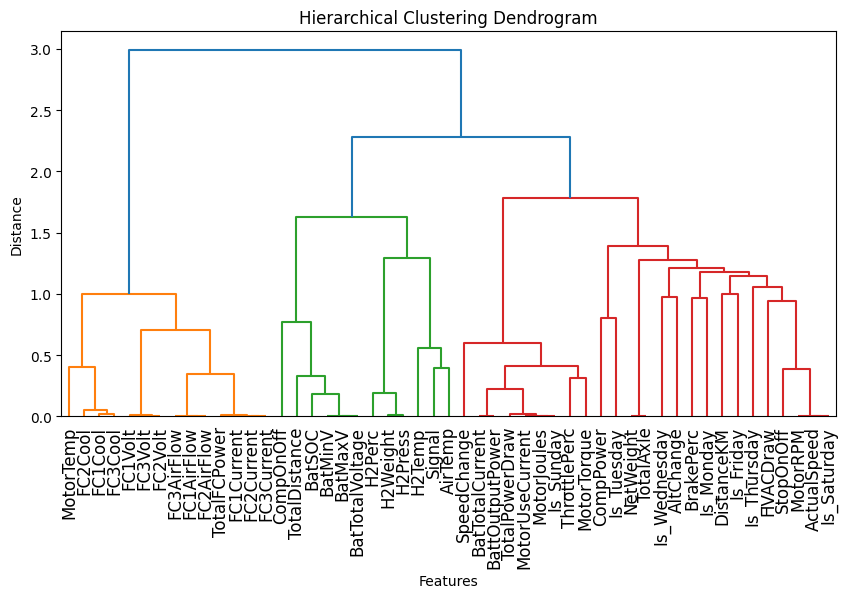

In [22]:
#Check hierarchical clustering to check which features are realted to eachother
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform


# Ensure 'datetime' is treated as a datetime column (if present) and not used in correlation
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])

# Filter out non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Replace NaNs and infinite values in the correlation matrix
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan)
corr_matrix = corr_matrix.fillna(0)

# Compute the distance matrix using pdist to ensure non-negative distances
# Use 'correlation' metric in pdist
dist_matrix = pdist(numeric_df.T, metric='correlation')  # Transpose to calculate distances between features

# Check for non-finite values in the distance matrix
print("Distance Matrix (condensed form):")
print(dist_matrix)

# Ensure the distance matrix contains only finite values
if not np.all(np.isfinite(dist_matrix)):
    print("Non-finite values detected in the distance matrix. Cleaning up...")
    dist_matrix = np.nan_to_num(dist_matrix)  # Replace NaNs and infinite values with zero

# Apply hierarchical clustering
try:
    Z = linkage(dist_matrix, method='ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=numeric_df.columns, leaf_rotation=90, leaf_font_size=12)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()
except ValueError as e:
    print(f"Error in linkage calculation: {e}")
    print("Inspecting the distance matrix for issues...")
    if not np.all(np.isfinite(dist_matrix)):
        print("The distance matrix contains non-finite values. Here are the problematic values:")
        print(dist_matrix[np.isinf(dist_matrix) | np.isnan(dist_matrix)])
    else:
        print("All values in the distance matrix are finite. Please check other potential issues.")


Correlation matrix for selected features FCXCool:
              MotorTemp   FC1Cool   FC2Cool   FC3Cool   FC1Volt   FC2Volt  \
MotorTemp      1.000000  0.674748  0.662832  0.668229  0.334532  0.333801   
FC1Cool        0.674748  1.000000  0.953807  0.979562  0.639622  0.638326   
FC2Cool        0.662832  0.953807  1.000000  0.959005  0.659030  0.657602   
FC3Cool        0.668229  0.979562  0.959005  1.000000  0.646074  0.644748   
FC1Volt        0.334532  0.639622  0.659030  0.646074  1.000000  0.991385   
FC2Volt        0.333801  0.638326  0.657602  0.644748  0.991385  1.000000   
FC3Volt        0.334772  0.640177  0.660833  0.645933  0.986947  0.995745   
FC1Current     0.337261  0.593611  0.607946  0.596770  0.593303  0.588867   
FC2Current     0.337245  0.592754  0.608309  0.596031  0.592709  0.588232   
FC3Current     0.338252  0.594500  0.609259  0.597996  0.593623  0.589121   
FC1AirFlow     0.347313  0.570008  0.584884  0.572725  0.717765  0.713914   
FC2AirFlow     0.344768  0

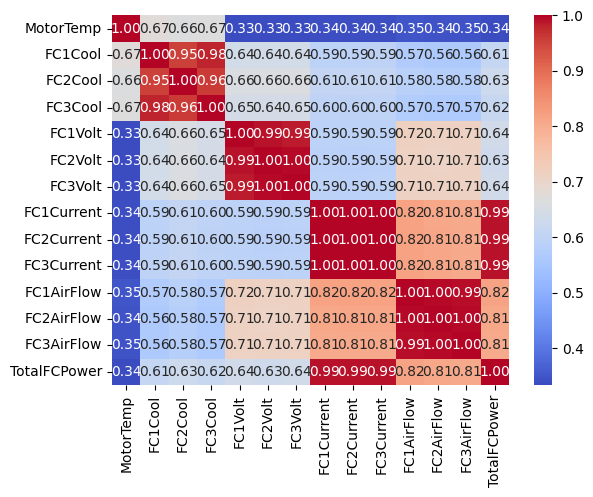

In [23]:
#Check which correlated , clustered features can be dropped in yellow cluster from the hierarchical dendogram
# 
selected_features = ['MotorTemp','FC1Cool', 'FC2Cool', 'FC3Cool','FC1Volt', 'FC2Volt', 'FC3Volt', 'FC1Current', 'FC2Current', 'FC3Current','FC1AirFlow', 'FC2AirFlow', 'FC3AirFlow', 'TotalFCPower' ]

# Calculate the correlation matrix for the selected features
correlation_matrix = df[selected_features].corr()

# Print the full correlation matrix for the selected features
print("Correlation matrix for selected features FCXCool:")
print(correlation_matrix)

# Save the correlation matrix of selected features to a CSV file
correlation_matrix.to_csv('selected_features_correlation_matrix.csv', index=True)

# Heatmap of the correlation matrix for the selected features
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Correlation matrix for selected features FCXCool:
                 CompOnOff  TotalDistance    BatSOC   BatMinV   BatMaxV  \
CompOnOff         1.000000       0.348120  0.460626  0.385385  0.381988   
TotalDistance     0.348120       1.000000  0.590184  0.803327  0.805584   
BatSOC            0.460626       0.590184  1.000000  0.854028  0.853289   
BatMinV           0.385385       0.803327  0.854028  1.000000  0.999867   
BatMaxV           0.381988       0.805584  0.853289  0.999867  1.000000   
BatTotalVoltage   0.383579       0.804687  0.853755  0.999955  0.999956   
H2Perc            0.014834       0.012384  0.007436  0.048867  0.048783   
H2Weight          0.167362       0.389416  0.251076  0.359949  0.360437   
H2Press           0.148375       0.351235  0.228617  0.327987  0.328461   
H2Temp            0.152147       0.248719  0.293678  0.265153  0.265778   
Signal            0.050124       0.224444  0.201880  0.221519  0.221400   
AirTemp          -0.021706      -0.139394  0.15429

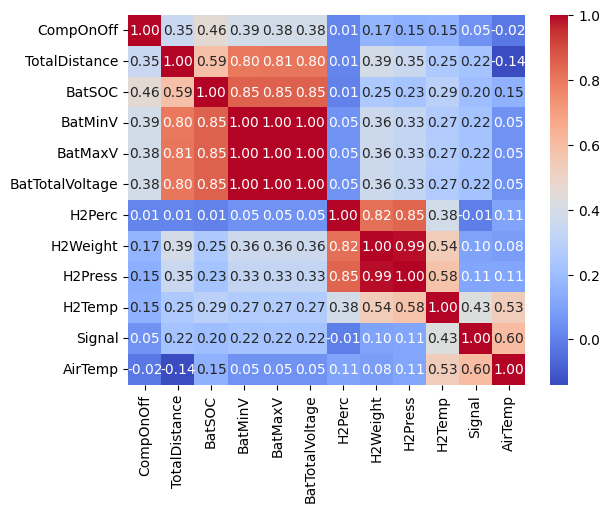

In [24]:
#Check which correlated , clustered features can be dropped in green cluster from the hierarchical dendogram
# 
selected_features = ['CompOnOff', 'TotalDistance', 'BatSOC','BatMinV','BatMaxV', 'BatTotalVoltage', 'H2Perc','H2Weight','H2Press','H2Temp','Signal','AirTemp']

# Calculate the correlation matrix for the selected features
correlation_matrix = df[selected_features].corr()

# Print the full correlation matrix for the selected features
print("Correlation matrix for selected features FCXCool:")
print(correlation_matrix)

# Save the correlation matrix of selected features to a CSV file
correlation_matrix.to_csv('selected_features_correlation_matrix.csv', index=True)

# Heatmap of the correlation matrix for the selected features
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Correlation matrix for selected features:
                 SpeedChange  BatTotalCurrent  BattOutputPower  \
SpeedChange         1.000000         0.466431         0.469551   
BatTotalCurrent     0.466431         1.000000         0.998687   
BattOutputPower     0.469551         0.998687         1.000000   
TotalPowerDraw      0.547318         0.844249         0.836795   
MotorUseCurrent     0.525693         0.850318         0.839501   
ThrottlePerc        0.420851         0.577890         0.569706   
MotorTorque         0.551998         0.678242         0.680576   
CompPower           0.085154        -0.001239         0.005107   
NetWeight           0.004296         0.087805         0.081597   
TotalAxle           0.004445         0.088008         0.081811   
AltChange           0.003983         0.104339         0.104667   
BrakePerc          -0.236477        -0.145902        -0.148256   
DistanceKM         -0.000497         0.001153         0.001057   
HVACDraw           -0.005316      

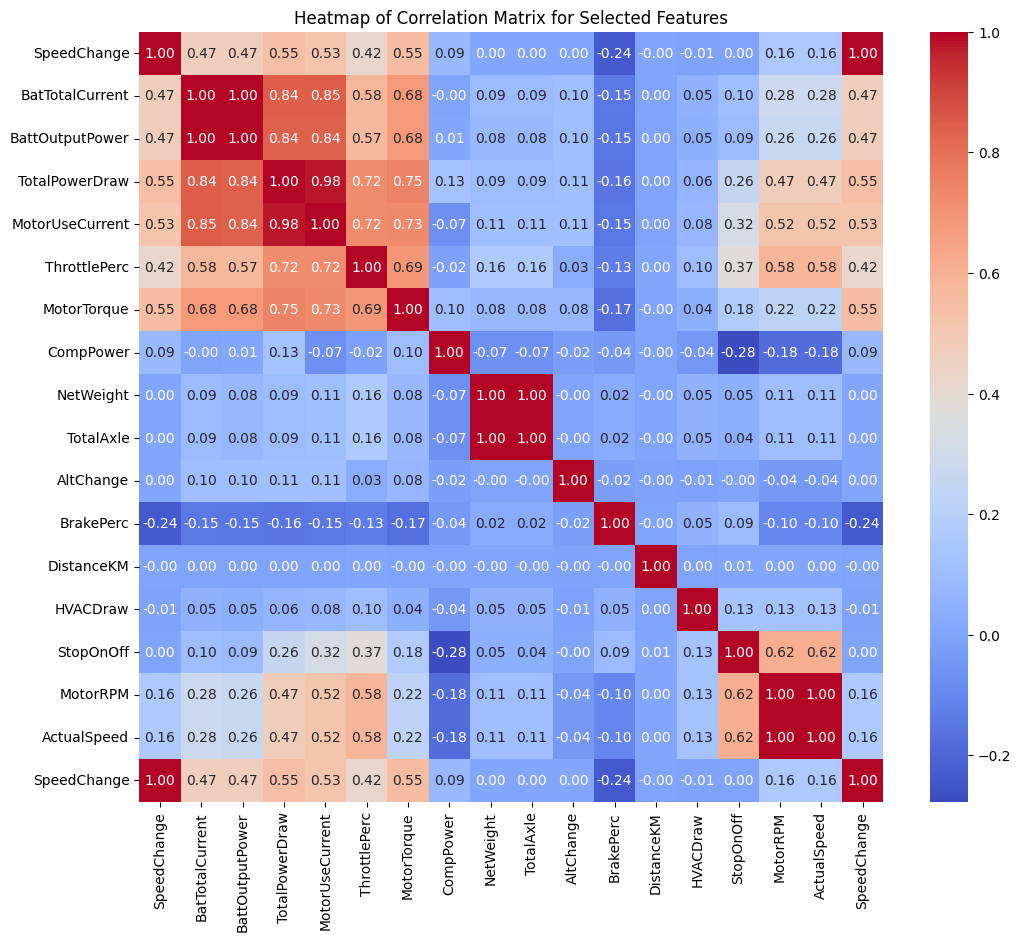

In [25]:
#Check which correlated , clustered features can be dropped in Red cluster from the hierarchical dendogram
# 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected features for correlation analysis
selected_features = ['SpeedChange', 'BatTotalCurrent', 'BattOutputPower', 'TotalPowerDraw', 'MotorUseCurrent', 
                     'ThrottlePerc', 'MotorTorque', 'CompPower', 'NetWeight', 'TotalAxle', 'AltChange', 
                     'BrakePerc', 'DistanceKM', 'HVACDraw', 'StopOnOff', 'MotorRPM', 'ActualSpeed', 'SpeedChange']

# Calculate the correlation matrix for the selected features
correlation_matrix = df[selected_features].corr()

# Print the full correlation matrix for the selected features
print("Correlation matrix for selected features:")
print(correlation_matrix)

# Save the correlation matrix of selected features to a CSV file
correlation_matrix.to_csv('selected_features_correlation_matrix.csv', index=True)

# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))  # Width and height in inches

# Create a heatmap of the correlation matrix for the selected features
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()


In [26]:
#Check wehre CSV file is stored
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/joelva/code/pgt-group-3/PGT Shared Notebooks Semester 2


In [27]:
#Parplot of final selected features

In [28]:
STOP EXECUTING BASE MODEL AND  PERFROMANCE

SyntaxError: invalid syntax (2389369355.py, line 1)

In [ ]:
raise SystemExit("Stopping execution of  STOP EXECUTING MODEL PERFROMANCE.")

In [29]:
START EXECUTING FINAL POLYNOMINAL MODEL

SyntaxError: invalid syntax (3511717212.py, line 1)

In [30]:
len(df)

309857

In [31]:
#Add the 'Operational Characteristics' to the model



           MAE           MSE         RMSE       R²
0  2164.172838  1.964148e+07  4431.870465  0.99989


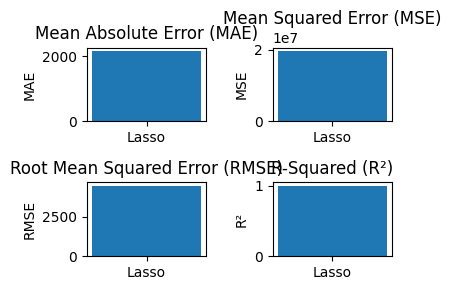


Selected features with Lasso regularization (alpha=10.0):

Features suggested to bring to zero (coefficients close to zero):
        Feature  Coefficient
2    DistanceKM          0.0
8    FC2Current         -0.0
9    FC3Current         -0.0
10    MotorTemp          0.0
14   FC2AirFlow         -0.0
17  MotorTorque          0.0
18      FC1Cool          0.0
20      FC3Cool         -0.0
25      FC2Volt          0.0
26      BatMaxV          0.0
30     H2Weight          0.0
31      H2Press         -0.0
36    Is_Friday         -0.0
38    Is_Sunday          0.0
40  Is_Saturday          0.0
46    TotalAxle          0.0

Retained features after stronger Lasso regularization:
            Feature    Coefficient
0       ActualSpeed  189261.957030
1         NetWeight      76.971093
3         StopOnOff      -4.700074
4      ThrottlePerc     518.260064
5   MotorUseCurrent  178980.027110
6         CompOnOff    -683.199090
7        FC1Current   -1021.848553
11     TotalFCPower    2636.930382
12       F

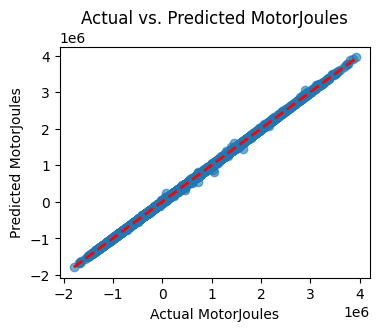

In [32]:
#Run Lasso to determine which feautures to keep in the polynominal model NEW
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with appropriate data

# Sample a smaller subset of the data if the dataset is very large
df_sample = df#.sample(n=10000, random_state=42) if len(df) > 10000 else df

# Define the target variable
target = 'MotorJoules'

# Automatically select numeric features by excluding the target column and non-numeric columns
features = df_sample.select_dtypes(include=[np.number]).columns.drop(target).tolist()

# Split data into features and target
X = df_sample[features]
y = df_sample[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation using Lasso
def evaluate_model_with_cross_validation(X, y, alpha=10.0, cv=3):  # Increased the alpha to regularize harder
    scaler = StandardScaler()  # Standardize features
    X_scaled = scaler.fit_transform(X)  # Fit and transform the data
    
    model = Lasso(alpha=alpha, max_iter=5000)  # Lasso with higher alpha for stronger regularization
    mae_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')
    
    # Fit the model to analyze coefficients
    model.fit(X_scaled, y)
    coefficients = model.coef_
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores),
        'Coefficients': coefficients,
        'Model': model,
        'Scaler': scaler  # Return the scaler used
    }

# Evaluate model using stronger Lasso regularization
alpha_value = 10.0  # Increased alpha to enforce stronger regularization
result = evaluate_model_with_cross_validation(X_train, y_train, alpha=alpha_value)

# Display results (without coefficients)
metrics = {key: result[key] for key in result if key not in ['Coefficients', 'Model', 'Scaler']}
df_results = pd.DataFrame(metrics, index=[0])
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(4, 3))

# MAE plot
axes[0, 0].bar(['Lasso'], df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Lasso'], df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Lasso'], df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Lasso'], df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Feature selection analysis
print(f"\nSelected features with Lasso regularization (alpha={alpha_value}):")
feature_names = X.columns
selected_features = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': result['Coefficients']
})

# Identify features with coefficients close to zero
near_zero_threshold = 0.01  # Define a threshold for coefficients close to zero
suggested_to_remove = selected_features[np.abs(selected_features['Coefficient']) < near_zero_threshold]
print("\nFeatures suggested to bring to zero (coefficients close to zero):")
print(suggested_to_remove)

# Features retained by Lasso
retained_features = selected_features[np.abs(selected_features['Coefficient']) >= near_zero_threshold]
print("\nRetained features after stronger Lasso regularization:")
print(retained_features)

# Evaluate the model on the test set
scaler = result['Scaler']
model = result['Model']

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate test set metrics
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print test set metrics
print("\nTest Set Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual MotorJoules')
plt.ylabel('Predicted MotorJoules')
plt.title('Actual vs. Predicted MotorJoules')
plt.show()


FINAL POLYNOMINAL MODEL

In [38]:
df.columns

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

DEFINITIE POLYNOMINAL MODEL

Train MAE: 71168.14403742575
Train MSE: 14844664232.835917
Train RMSE: 121838.68118473672
Train R²: 0.9170185928804935
Test MAE: 71361.72129685881
Test MSE: 14595563030.960781
Test RMSE: 120812.09803227813
Test R²: 0.9172458204354778


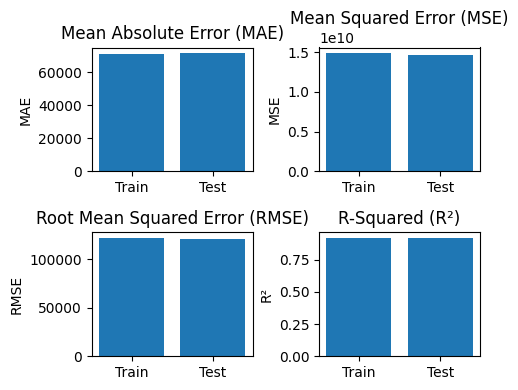

/tmp/ipykernel_1552/1045706406.py:141: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


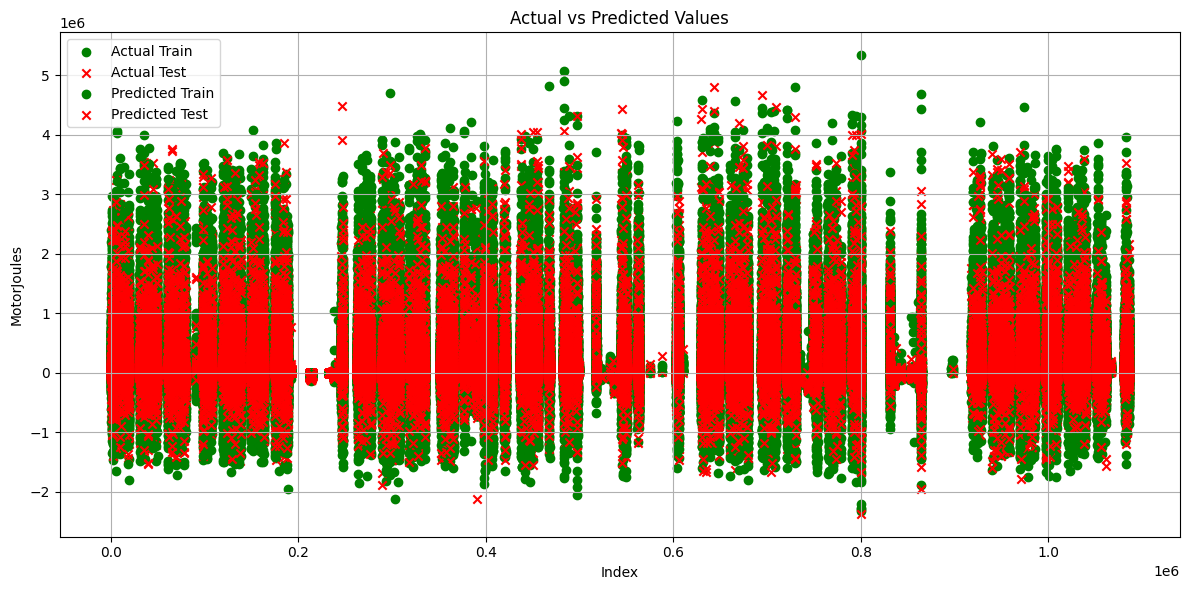

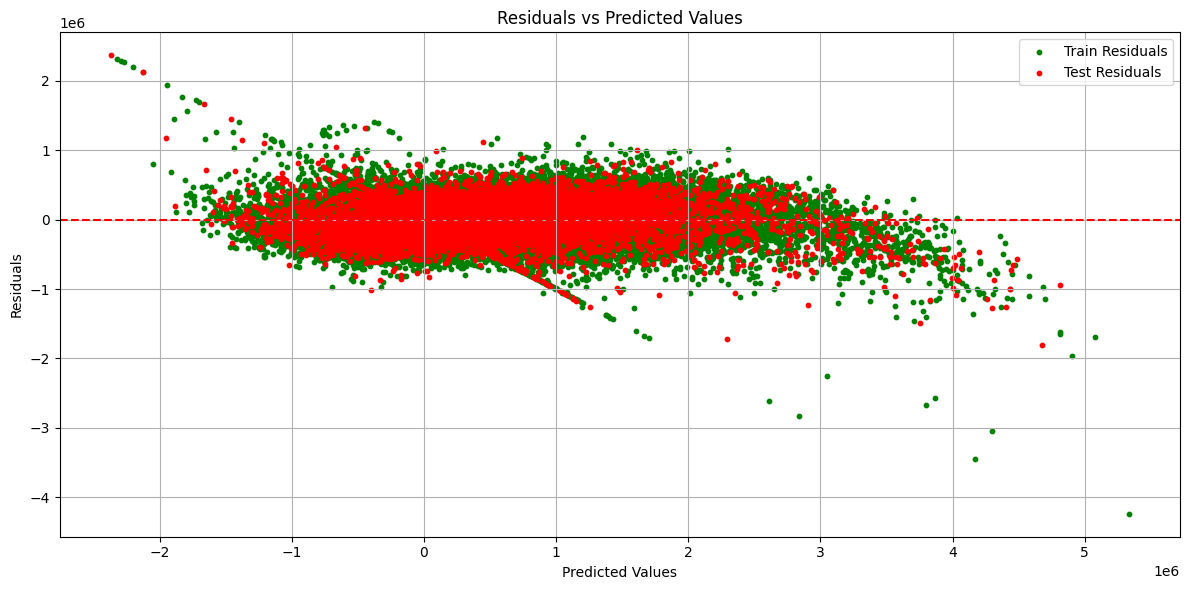

In [39]:
#Final Model, not regularised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample your dataset if it's too large
#df_sampled = df.sample(n=1000, random_state=42)  # Example for sampling, adjust n as needed

# Define a smaller subset of features to reduce complexity
features = ['StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'TotalFCPower', 
 'FC1AirFlow', 
 'CompPower', 
 'FC3Volt', 
 'BatTotalVoltage', 
 'BatMinV', 
 'HVACDraw', 
 'BrakePerc', 
 'Signal', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange']
target = 'MotorJoules'


# Split data into features and target
X = df[features]
y = df[target]



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

# MAE plot
axes[0, 0].bar(['Train', 'Test'], [mae_train, mae_test])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(['Train', 'Test'], [mse_train, mse_test])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(['Train', 'Test'], [rmse_train, rmse_test])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(['Train', 'Test'], [r2_train, r2_test])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='green', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='red', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='red', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:

#P-values for the final model
import statsmodels.api as sm

# We assume you have already computed X_train_poly and y_train as shown in your previous steps

# Add a constant to the model (intercept)
X_train_poly_sm = sm.add_constant(X_train_poly)

# Fit the model
model_sm = sm.OLS(y_train, X_train_poly_sm).fit()



In [46]:
##P-values for the final model  Reset the index of the DataFrame and the target variable to ensure alignment
X_train_poly_df = X_train_poly_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Now fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_poly_df).fit()

# Print out the statistics
print(model_sm.summary())


NameError: name 'X_train_poly_df' is not defined

Train MAE: 71114.60982228712
Train MSE: 14823034172.05198
Train RMSE: 121749.88366340224
Train R²: 0.9170452677072676
Test MAE: 71095.40057292179
Test MSE: 14682711618.162874
Test RMSE: 121172.23946994985
Test R²: 0.9177488121590192


/tmp/ipykernel_1552/1760552099.py:124: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


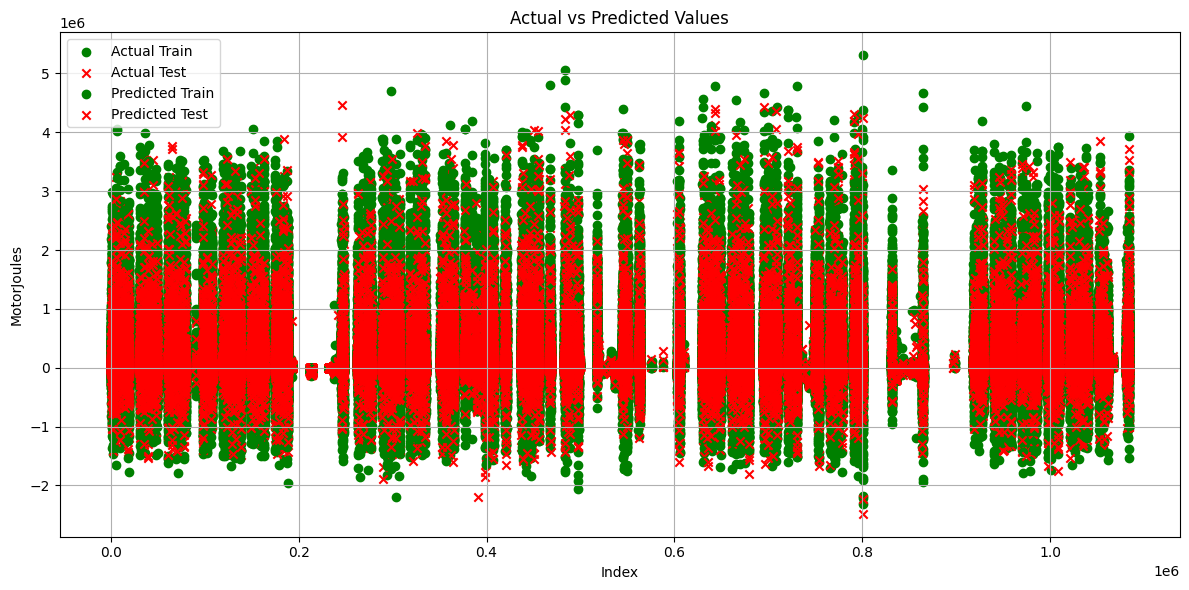

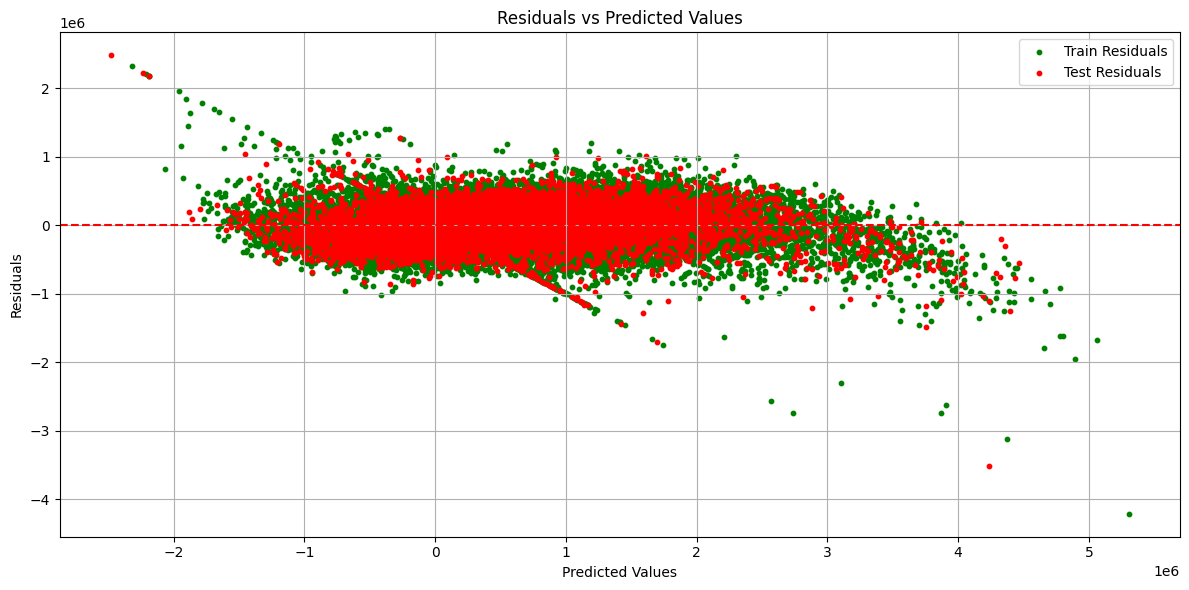

['poly_transformer.pkl']

In [47]:
#Save the Model as a function NEW

#Final polynominal model, actuals vs predicition and resiudials with date spec
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For loading models

# Assuming 'df' is your DataFrame and it contains a 'datetime' column for date filtering
# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define a function to filter data by date range
def filter_by_date(df, start_date, end_date):
    mask = (df['datetime'] >= start_date) & (df['datetime'] <= end_date)
    return df[mask]

# Specify the date range for filtering
start_date = '2022-08-01'
end_date = '2023-08-01'  # Adjust the end date as needed

# Filter the dataset based on the specified date range
filtered_df = filter_by_date(df, start_date, end_date)

# Define a smaller subset of features to reduce complexity
features = [ 'StopOnOff', 
 'ThrottlePerc', 
 'CompOnOff', 
 'TotalFCPower', 
 'FC1AirFlow', 
 'CompPower', 
 'FC3Volt', 
 'BatTotalVoltage', 
 'BatMinV', 
 'HVACDraw', 
 'BrakePerc', 
 'Signal', 
 'BatSOC', 
 'H2Temp', 
 'AirTemp', 
 'H2Perc', 
 'ActualSpeed', 
 'NetWeight', 
 'SpeedChange', 
]
target = 'MotorJoules'

# Split data into features and target
X = filtered_df[features]
y = filtered_df[target]




# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    return poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the polynomial degree to decrease complexity
degree = 2  # Change to 2 or even 1 (linear) to simplify
X_train_poly = generate_polynomial_features(X_train_scaled, degree)
X_test_poly = generate_polynomial_features(X_test_scaled, degree)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate performance measures
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print performance measures
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Train R²: {r2_train}')

print(f'Test MAE: {mae_test}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual values for Train and Test sets
plt.scatter(X_train.index, y_train, color='green', label='Actual Train', marker='o')
plt.scatter(X_test.index, y_test, color='red', label='Actual Test', marker='x')

# Predicted values for Train and Test sets
plt.scatter(X_train.index, y_train_pred, color='green', label='Predicted Train', marker='o')
plt.scatter(X_test.index, y_test_pred, color='red', label='Predicted Test', marker='x')

plt.xlabel('Index')
plt.ylabel('MotorJoules')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot to check for patterns
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, color='green', s=10, label='Train Residuals')
plt.scatter(y_test_pred, y_test - y_test_pred, color='red', s=10, label='Test Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results to CSV
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
df_results = pd.DataFrame(results)
df_results.to_csv('polynomial_model_performance.csv', index=False)


# Save the model, scaler, and polynomial transformer
joblib.dump(model, 'polynomial_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(PolynomialFeatures(degree=degree, include_bias=False), 'poly_transformer.pkl')

In [48]:
raise SystemExit("Stopping execution of  MODEL SELECTION.")

SystemExit: Stopping execution of  MODEL SELECTION.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [49]:
#Cross validation evaluate models-RMSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


features = ['StopOnOff', 'ThrottlePerc', 'CompOnOff', 'TotalFCPower', 'FC1AirFlow', 'CompPower', 'FC3Volt', 
            'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'BrakePerc', 'Signal', 'BatSOC', 'H2Temp', 'AirTemp', 
            'H2Perc', 'ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Splitting the data into features and target
X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the models
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Setup cross-validation
cv = KFold(n_splits=3, random_state=42, shuffle=True)

# Function to evaluate models
def evaluate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    return np.sqrt(-scores)  # Return RMSE

# Calculating RMSE for each model
poly_scores = evaluate_model(poly_model, X_scaled, y, cv)
gbm_scores = evaluate_model(gbm_model, X_scaled, y, cv)
rf_scores = evaluate_model(rf_model, X_scaled, y, cv)

# Printing RMSE results
print("Polynomial Regression RMSE:", np.mean(poly_scores))
print("GBM RMSE:", np.mean(gbm_scores))
print("Random Forest RMSE:", np.mean(rf_scores))


Polynomial Regression RMSE: 122196.68703797327
GBM RMSE: 119426.06209412152
Random Forest RMSE: 95905.02179830692


In [50]:
#Cross validation evaluate models-RMSE, MAE, MSE R-square
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame with the necessary features and target
features = ['StopOnOff', 'ThrottlePerc', 'CompOnOff', 'TotalFCPower', 'FC1AirFlow', 'CompPower', 'FC3Volt', 
            'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'BrakePerc', 'Signal', 'BatSOC', 'H2Temp', 'AirTemp', 
            'H2Perc', 'ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Splitting the data into features and target
X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the models
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Setup cross-validation
cv = KFold(n_splits=3, random_state=42, shuffle=True)

# Function to evaluate models and calculate MAE, MSE, RMSE, and R-squared
def evaluate_model(model, X, y, cv):
    mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

    mae = -np.mean(mae_scores)
    mse = -np.mean(mse_scores)
    rmse = np.sqrt(mse)
    r2 = np.mean(r2_scores)

    return mae, mse, rmse, r2

# Evaluating each model
poly_mae, poly_mse, poly_rmse, poly_r2 = evaluate_model(poly_model, X_scaled, y, cv)
gbm_mae, gbm_mse, gbm_rmse, gbm_r2 = evaluate_model(gbm_model, X_scaled, y, cv)
rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_scaled, y, cv)

# Printing results
print("Polynomial Regression Metrics: MAE={}, MSE={}, RMSE={}, R^2={}".format(poly_mae, poly_mse, poly_rmse, poly_r2))
print("GBM Metrics: MAE={}, MSE={}, RMSE={}, R^2={}".format(gbm_mae, gbm_mse, gbm_rmse, gbm_r2))
print("Random Forest Metrics: MAE={}, MSE={}, RMSE={}, R^2={}".format(rf_mae, rf_mse, rf_rmse, rf_r2))


Polynomial Regression Metrics: MAE=71200.89439197582, MSE=14933113687.525808, RMSE=122201.11982926265, R^2=0.9162847903618236
GBM Metrics: MAE=53810.953478304094, MSE=14262668122.894669, RMSE=119426.41300355073, R^2=0.9200450780864161
Random Forest Metrics: MAE=38062.29351820828, MSE=9198530988.230698, RMSE=95908.9724073337, R^2=0.948432183088895
